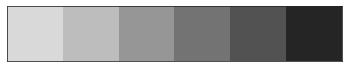

In [48]:
from solver import Solver, Region
from numpy import random
import pickle
import os.path as path
import numpy as np 
from bioproc.proc_models import *   
from bioproc.proc_opt import *
from bioproc.hill_functions import *
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import os.path 
from deap import creator, base, tools, algorithms  
import seaborn as sns

sns.set_style("white")
#flatui = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
#flatui = ['#bdbdbd','#969696','#737373','#525252','#252525','#000000']
flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)


### Simulation params

In [49]:
dt = 0.001

### Simulation params

In [50]:
models = [one_bit_processor_ext, two_bit_processor_ext, three_bit_processor_ext, four_bit_processor_ext]  
model = []

for model_index in range(4):     
    #folder = folders[model_index]        
    model.append(BioProc(np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill", "protein_production", "protein_degradation", "Kd", "hill"]), models[model_index], plot_fitness=False))
    #solver = Solver(model)    
   

-30
-20
-18
-17


### Additional functions

In [51]:
init_valid = [np.array([0]*6),
              np.array([0]*12),  
              np.array([0]*18),
              np.array([0]*24)]


def plot_points(axes, points, n_bits = 2, plot_clock=True, plot_q = False, hot_start = True, save_fig = True):
    
    for i, (a,p) in enumerate(zip(axes, points)):
       
        params_ff = p[0:8]        
        params_addr = p[8:]  
        

        if n_bits == 1:
            T = 100
        elif n_bits == 2:
            T = 200
        elif n_bits == 3:
            T = 300
        elif n_bits == 4:
            T = 400
        else:
            T = 160
    
        N = int(T/dt)    
        ts = np.linspace(0, T, N)   
        clk = get_clock(ts)

        
        if n_bits == 1 or (n_bits == 0 and i == 0):
            
            
            
            y0 = init_valid[0]# np.array([0]*6)  
            if hot_start:
                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(one_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[0] = Y[-1,:].flatten()
                    y0 = init_valid[0]# np.array([0]*6)  
            
            Y = odeint(one_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            
            i1 = Y[:,-2]         
            i2 = Y[:,-1]        
            
            q = Y[:,2]       
            

            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            if plot_q:
                a.plot(ts, q, label='q') 
            if plot_clock:
                #a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
                a.plot(ts, clk, 'k--', alpha = 0.5, label='clk') 
            #a.set_xlabel("Time [h]")
            #a.legend(loc='upper left')       
            
            
        elif n_bits == 2 or (n_bits == 0 and i == 1):
            y0 = init_valid[1]# np.array([0]*6)  
            
            if hot_start:                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(two_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[1] = Y[-1,:].flatten()
                    y0 = init_valid[1]# np.array([0]*6)  
            
            Y = odeint(two_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            
            init_valid[1] = Y[np.abs(ts - 10) <0.0001,:].flatten()
        
            i1 = Y[:,-4]         
            i2 = Y[:,-3]        
            i3 = Y[:,-2]  
            i4 = Y[:,-1]   

            q1 = Y[:,2]       
            q2 = Y[:,6]        


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
            if plot_clock:
                #a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
                a.plot(ts, clk, 'k--', alpha = 0.5, label='clk') 
            #a.set_xlabel("Time [h]")
            #a.legend(loc='upper left')       
        elif n_bits == 3 or (n_bits == 0 and i == 2):
            y0 = init_valid[2]# np.array([0]*6)  
            
            if hot_start:                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(three_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[2] = Y[-1,:].flatten()
                    y0 = init_valid[2]# np.array([0]*6)  
                        
            Y = odeint(three_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            init_valid[2] = Y[np.abs(ts - 10) <0.0001,:].flatten()
        
            i1 = Y[:,-6]         
            i2 = Y[:,-5]        
            i3 = Y[:,-4]  
            i4 = Y[:,-3]   
            i5 = Y[:,-2]   
            i6 = Y[:,-1]   
            
            q1 = Y[:,2]       
            q2 = Y[:,6]        
            q3 = Y[:,10]


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            a.plot(ts, i5, label='i5')
            a.plot(ts, i6, label='i6')
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
                a.plot(ts, q3, label='q3') 
            if plot_clock:
                #a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
                a.plot(ts, clk, 'k--', alpha = 0.5, label='clk') 
            #a.set_xlabel("Time [h]")
            #a.legend(loc='upper left')       
        elif n_bits == 4 or (n_bits == 0 and i == 3):
            y0 = init_valid[3]# np.array([0]*6)  
            
            if hot_start:                
                for i in range(3):                    
                    ts_small = ts[ts < 5]
                    Y = odeint(four_bit_processor_ext, y0, ts_small, args=(params_ff, params_addr))                     
                    init_valid[3] = Y[-1,:].flatten()
                    y0 = init_valid[3]# np.array([0]*6)  
                        
            Y = odeint(four_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            init_valid[3] = Y[np.abs(ts - 10) <0.0001,:].flatten()
        
            i1 = Y[:,-8]         
            i2 = Y[:,-7]        
            i3 = Y[:,-6]         
            i4 = Y[:,-5]        
            i5 = Y[:,-4]  
            i6 = Y[:,-3]   
            i7 = Y[:,-2]   
            i8 = Y[:,-1]   
            
            q1 = Y[:,2]       
            q2 = Y[:,6]        
            q3 = Y[:,10]
            q4 = Y[:,14]


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            a.plot(ts, i5, label='i5')
            a.plot(ts, i6, label='i6')
            a.plot(ts, i7, label='i7')
            a.plot(ts, i8, label='i8')
            
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
                a.plot(ts, q3, label='q3') 
                a.plot(ts, q4, label='q4') 
            if plot_clock:
                #a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
                a.plot(ts, clk, 'k--', alpha = 0.5, label='clk') 
            a.set_xlabel("Time [h]")
            #a.legend(loc='upper left')       
            
            
    if save_fig:        
        axes[0].set_ylabel("Concetrations [nM]")
        plt.gcf().set_size_inches(15,5)
        plt.savefig('figs\\proc_'+str(n_bits)+'_ODE.pdf', bbox_inches = 'tight')
        #plt.savefig('figs\\proc_'+str(n_bits)+'_ODE.eps', bbox_inches = 'tight')
        plt.show()
    np.savetxt('figs\\proc_'+str(n_bits)+'.txt', points)
        
        
    

# Plot predefined points

### Statically defined

In [52]:
points1 = np.array([[16.7142123, 41.35777581, 25.62004154, 50., 3.45308182, 0.72021256, 7.06910448, 5., 50., 0.58038232, 4.72963337, 2.09047277],
                    [44.75796038, 44.56125843, 22.1113692, 50., 1.49609519, 0.72021256, 6.67402739, 5., 50., 0.58038232, 6.17340269, 1.72638342],
                    [35.58227778, 41.35777581, 16.93207762, 40.92107467, 2.64058623, 0.66017822, 9.62045586, 3.81639044, 45.90182014, 0.58038232, 1.33511836, 1.52108708]])
points2 = np.array([[19.76090113,41.15629781,17.93892382,50.,3.06945198,0.6348498,8.48221145,5.,50.,0.55229533,19.4448549,5.,],
                    [24.54900936,41.15629781,22.25923667,50.,2.52717827,0.6348498,5.78301014,5.,50.,0.55229533,19.4448549,5.,],
                    [19.01312141,50.,15.69457423,50.,1.99090873,0.6749633,8.39132541,5.,50.,0.54571671,27.44382786,5.,]])
points3 = np.array([[15.61036177,32.61999927,33.65461794,3.44471276,3.53604366,0.34430292,4.65728739,3.51555656,50.,0.59701916,4.68778842,2.56838898],
                    [14.35138363,41.23389618,31.70571365,6.22717818,4.45989656,0.34430292,5.99151922,5.,50.,0.52258935,3.79394175,2.56838898],
                    [15.61036177,50.,33.65461794,6.22717818,5.22054044,0.34430292,6.22917531,4.26980173,50.,0.55738533,7.40976,2.56838898]])

points4 = points3

Points = np.array([points1, points2, points3, points4])

### or from files

In [53]:
p11 = pickle.load(open("selected_points\\model1sample1.p", "rb"))      
p12 = pickle.load(open("selected_points\\model1sample2.p", "rb"))      
p13 = pickle.load(open("selected_points\\model1sample3.p", "rb"))      
points1 = np.array([p11, p12, p13])

p21 = pickle.load(open("selected_points\\model2sample1.p", "rb"))      
p22 = pickle.load(open("selected_points\\model2sample2.p", "rb"))      
p23 = pickle.load(open("selected_points\\model2sample3.p", "rb"))      
points2 = np.array([p21, p22, p23])

p31 = pickle.load(open("selected_points\\model3sample1.p", "rb"))      
p32 = pickle.load(open("selected_points\\model3sample2.p", "rb"))      
p33 = pickle.load(open("selected_points\\model3sample3.p", "rb"))      
points3 = np.array([p31, p32, p33])

points4 = points3

Points = np.array([points1, points2, points3, points4])

-17.472210025697606
-17.49434333271572
-21.18228739665168
-14.508554811151765
-12.051028905923427
-18.133934311314917
-17.89728727187403
-5.332559155219235
-15.247319728259477


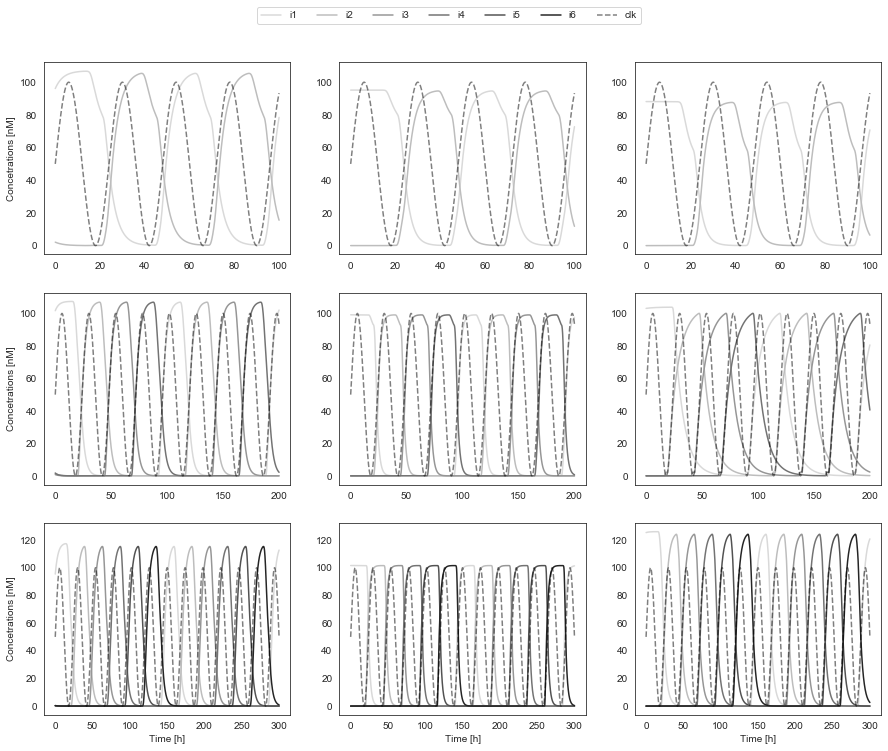

In [54]:
for n_bits in range(1,4):
    i = n_bits-1
    points = Points[i]
    #points = Points[2]

        
    for j in range(3):
        m = model[i]
        m.eval(points[j])

        
    ax1=plt.subplot(3, 3, 3*i + 1)
    ax2=plt.subplot(3, 3, 3*i + 2, sharey = ax1)
    ax3=plt.subplot(3, 3, 3*i + 3, sharey = ax1)
    plot_points([ax1, ax2, ax3], points[:3], n_bits=n_bits, plot_q=False, save_fig=False)
    #plot_points([ax1], points[:1], n_bits=n_bits)
    
    ax1.set_ylabel("Concetrations [nM]")
    #ax3.legend(loc='upper left')   
    
ax1.set_xlabel("Time [h]")
ax2.set_xlabel("Time [h]")
ax3.set_xlabel("Time [h]")

ax3.legend(ncol=10, 
          loc='upper center',
          bbox_to_anchor=(0.5, 0.95),
          bbox_transform=plt.gcf().transFigure)


plt.gcf().set_size_inches(15,12)
plt.savefig('figs\\proc_basic_ODE.pdf', bbox_inches = 'tight')
#plt.savefig('figs\\proc_basic_ODE.eps', bbox_inches = 'tight')
plt.show()


### Save initial state of the system

In [8]:
np.savetxt('init1bit.txt', init_valid[0])
np.savetxt('init2bit.txt', init_valid[1])
np.savetxt('init3bit.txt', init_valid[2])
np.savetxt('init4bit.txt', init_valid[3])

# Read points from the results of optimization

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Candidate", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("candidate", Solver.generateCandidate) 

In [10]:
file =  os.path.join(".", "results_opt", "01_bioprocViableSet_IterGA.p")    
viablePoints1 = np.array(pickle.load(open(file, "rb")))     
number1 = np.size(viablePoints1, 0) 
rndPoints = np.array(np.random.randint(number1, size=20)) 
points1 = viablePoints1[rndPoints]

In [11]:
file =  os.path.join(".", "results_opt", "02_bioprocViableSet_IterGA.p")    
viablePoints2 = np.array(pickle.load(open(file, "rb")))     
number2 = np.size(viablePoints2, 0) 
rndPoints = np.array(np.random.randint(number2, size=20)) 
points2 = viablePoints2[rndPoints]

In [12]:
file =  os.path.join(".", "results_opt", "03_bioprocViableSet_IterGA.p")    
viablePoints3 = np.array(pickle.load(open(file, "rb")))     
number3 = np.size(viablePoints3, 0) 
rndPoints = np.array(np.random.randint(number3, size=20)) 
points3 = viablePoints3[rndPoints]

In [13]:
file =  os.path.join(".", "results_opt", "04_bioprocViableSet_IterGA.p")    
viablePoints4 = np.array(pickle.load(open(file, "rb")))     
number4 = np.size(viablePoints4, 0) 
rndPoints = np.array(np.random.randint(number4, size=20)) 
points4 = viablePoints4[rndPoints]

In [14]:
number = np.array([number1, number2, number3, number4])
points = np.array([points1, points2, points3, points4])
viablePoints = np.array([viablePoints1, viablePoints2, viablePoints3, viablePoints4])

## Plot feasible solutions for each topology
Make plots and save them to ```/figs``` folder together with the parameter values

-20.60153661905646
-22.310385264884133
-24.16411866114391


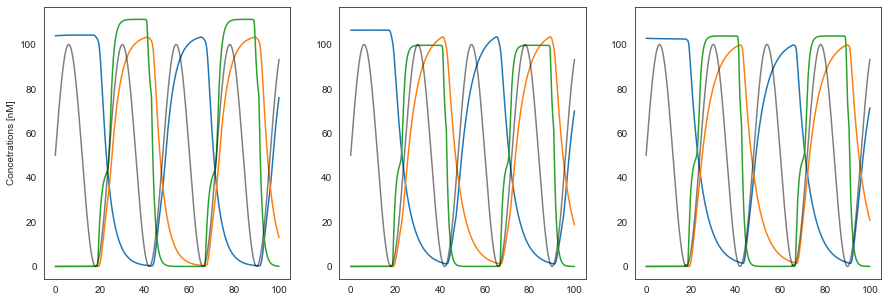

-18.07657746599285
-10.356459653381812
-9.723138911358


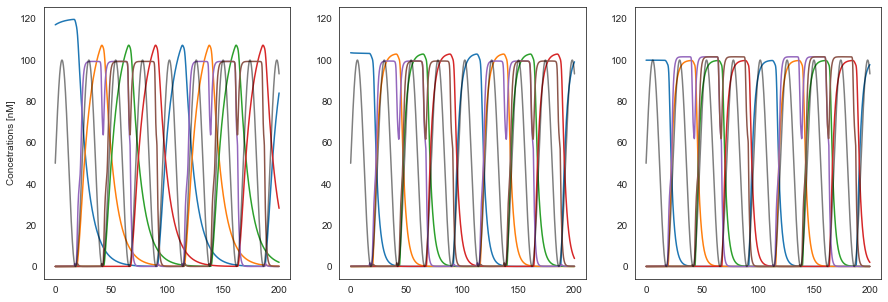

-5.522709338716677
-7.4999812601832545
-7.205535164215156


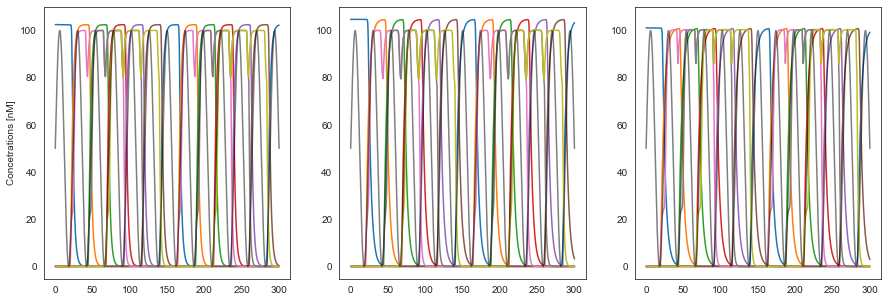

-11.812696273735343
-10.983897114043266
-12.180401357462632


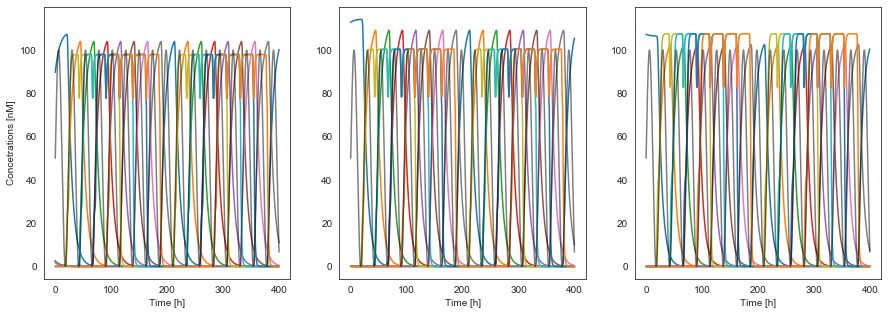

In [15]:
for n_bits in range(1,5): #[3]:
    i = n_bits-1
    
    rndPoints = np.array(np.random.randint(number[i], size=3)) 
    points = viablePoints[i][rndPoints]
    
    #points = np.loadtxt('selected_points.txt')
    
    for j in range(3):
        m = model[i]
        m.eval(points[j])

    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2, sharey = ax1)
    ax3=plt.subplot(1, 3, 3, sharey = ax1)
    plot_points([ax1, ax2, ax3], points[:3], n_bits=n_bits, plot_q = True)
    

